# Análisis de Delitos

Objetivo:
* Implementar un modelo del clasificación para el análsis de delitos en la Ciudad de México
* Datos: https://datos.cdmx.gob.mx/dataset/victimas-en-carpetas-de-investigacion-fgj

## Bibliotecas y setup

In [1]:
# Dependencies
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#
import warnings
warnings.filterwarnings('ignore') # Para ignorar warnings

### Nota: Si alguna biblioteca no se instala utilizar el siguiente código

In [ ]:
#
#!pip install pip # Cuando utilicen por primera vez pip
#!pip install <<name_library>>

## SECCIÓN I:

### ¿Qué nos dicen los datos?

Se trata de datos que contienen la información actualizada de las víctimas de los delitos en las carpetas de investigación de la Fiscalía General de Justicia (FGJ) de la Ciudad de México a partir de enero de 2019.

Para una correcta interpretación de la información, la CDMX hizó las siguientes aclaraciones:

* El campo "fecha_hecho" representa la fecha en la que ocurrió el hecho.
* El campo "fecha_inicio" corresponde a la fecha de la apertura de la carpeta de investigación.
* En esta base se señala el sexo de la víctima, así como la fecha en que ocurrieron los hechos denunciados.
* Es importante destacar que, aunque en algunas ocasiones la víctima es la persona denunciante, en otras, denunciante y víctima son personas diferentes (por ejemplo, casos en los que menores de edad son víctimas).
* Es posible que en una misma denuncia se incluya a una o más víctimas.
* Existen otras aclaraciones en: https://datos.cdmx.gob.mx/dataset/victimas-en-carpetas-de-investigacion-fgj

**Los datos de esta tabla fueron actualizados por la FGJ el 29 de julio de 2020.**

Los datos antes de la actualización del 29 de julio de 2020 los puedes consultar en esta liga: Victimas antes de la actualización de julio de 2020 [https://archivo.datos.cdmx.gob.mx/fiscalia-general-de-justicia/victimas-en-carpetas-de-investigacion-fgj/victimas_ss_junio2020.csv]

In [2]:
# Consulta a una dirección Web que aloja un archivo CSV (DATOS ACTUALIZADOS)

Datos = pd.read_csv('https://archivo.datos.cdmx.gob.mx/FGJ/victimas/victimasFGJ_acumulado_2024_08.csv')

Datos.tail()

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,sexo,edad,tipo_persona,calidad_juridica,competencia,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud
1396169,2024.0,Junio,2024-06-30,09:21:11,2024.0,Junio,2024-06-29,19:32:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,Masculino,34.0,FISICA,LESIONADO,FUERO COMUN,LA JOYA,La Joya,ALVARO OBREGON,Álvaro Obregón,CDMX,19.385603,-99.212804
1396170,2024.0,Marzo,2024-03-22,22:19:04,2024.0,Marzo,2024-03-19,22:30:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Femenino,NaN,FISICA,VICTIMA,FUERO COMUN,CHURUBUSCO COUNTRY CLUB,Churubusco Country Club,COYOACAN,Coyoacán,CDMX,19.349671,-99.145388
1396171,2024.0,Mayo,2024-05-05,14:20:50,2024.0,Mayo,2024-05-05,10:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,SAN GREGORIO ATLAPULCO,Barrio La Candelaria,XOCHIMILCO,Xochimilco,CDMX,19.253968,-99.043144
1396172,2024.0,Mayo,2024-05-13,04:41:22,2024.0,Mayo,2024-05-12,22:12:00,PLAGIO O SECUESTRO,SECUESTRO,Masculino,44.0,FISICA,VICTIMA,FUERO COMUN,NaN,NaN,CDMX (indeterminada),CDMX (indeterminada),CDMX,NaN,NaN
1396173,2024.0,Mayo,2024-05-20,13:18:33,2024.0,Febrero,2024-02-28,20:30:00,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,42.0,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,MORELOS,Morelos,CUAUHTEMOC,Cuauhtémoc,CDMX,19.445592,-99.126531


In [3]:
#

Datos.shape

(1396174, 22)

In [4]:
#

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396174 entries, 0 to 1396173
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   anio_inicio        1396161 non-null  float64
 1   mes_inicio         1396161 non-null  object 
 2   fecha_inicio       1396161 non-null  object 
 3   hora_inicio        1396161 non-null  object 
 4   anio_hecho         1395757 non-null  float64
 5   mes_hecho          1395757 non-null  object 
 6   fecha_hecho        1395756 non-null  object 
 7   hora_hecho         1395767 non-null  object 
 8   delito             1396162 non-null  object 
 9   categoria_delito   1396162 non-null  object 
 10  sexo               1151296 non-null  object 
 11  edad               917649 non-null   float64
 12  tipo_persona       1388682 non-null  object 
 13  calidad_juridica   1396161 non-null  object 
 14  competencia        1396162 non-null  object 
 15  colonia_hecho      1322469 non-n

In [5]:
# Consulta a una dirección Web que aloja un archivo CSV (DATOS NO ACTUALIZADOS)

Datos_OLD = pd.read_csv('https://archivo.datos.cdmx.gob.mx/fiscalia-general-de-justicia/victimas-en-carpetas-de-investigacion-fgj/victimas_ss_junio2020.csv')

Datos_OLD.tail()

,idCarpeta,Año_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,competencia,Año_hecho,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud
369734,8711995,2020,Junio,30/06/2020,FRAUDE,DELITO DE BAJO IMPACTO,Femenino,56.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2020.0,Junio,29/06/2020,03:30:00,23:39:00,ALVARO OBREGON,AXOTLA,AV UNIVERSIDAD,INDUSTRIA,19.358334,-99.172309
369735,8711983,2020,Junio,30/06/2020,NEGACION DEL SERVICIO PUBLICO,DELITO DE BAJO IMPACTO,Masculino,NaN,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Diciembre,20/12/2019,22:30:00,23:46:00,ALVARO OBREGON,PROGRESO,AV- MEMXICO,AV. TOLUCA Y TLAXCALA (FISCALIA DE INVESTIGACI...,19.339645,-99.201685
369736,8711983,2020,Junio,30/06/2020,NEGACION DEL SERVICIO PUBLICO,DELITO DE BAJO IMPACTO,Femenino,NaN,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Diciembre,20/12/2019,22:30:00,23:46:00,ALVARO OBREGON,PROGRESO,AV- MEMXICO,AV. TOLUCA Y TLAXCALA (FISCALIA DE INVESTIGACI...,19.339645,-99.201685
369737,8711980,2020,Junio,30/06/2020,AMENAZAS,DELITO DE BAJO IMPACTO,Femenino,NaN,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2020.0,Junio,30/06/2020,18:40:00,23:47:00,CUAUHTEMOC,GUERRERO,PEDRO MORENO,AV. PASEO DE LA REFORMA,19.441199,-99.143585
369738,8711986,2020,Junio,30/06/2020,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,28.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2020.0,Junio,30/06/2020,21:30:00,23:55:00,IZTACALCO,SANTIAGO SUR,PLAYA NIZUC,AV. AMACUZAC,19.389455,-99.127101


In [6]:
#

Datos_OLD.shape

(369739, 22)

In [7]:
#

Datos_OLD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369739 entries, 0 to 369738
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   idCarpeta        369739 non-null  int64  
 1   Año_inicio       369739 non-null  int64  
 2   Mes_inicio       369739 non-null  object 
 3   FechaInicio      369739 non-null  object 
 4   Delito           369739 non-null  object 
 5   Categoria        369739 non-null  object 
 6   Sexo             291714 non-null  object 
 7   Edad             231640 non-null  float64
 8   TipoPersona      366355 non-null  object 
 9   CalidadJuridica  369739 non-null  object 
 10  competencia      369739 non-null  object 
 11  Año_hecho        369492 non-null  float64
 12  Mes_hecho        369492 non-null  object 
 13  FechaHecho       369492 non-null  object 
 14  HoraHecho        369494 non-null  object 
 15  HoraInicio       369738 non-null  object 
 16  AlcaldiaHechos   369724 non-null  obje

In [8]:
# Agrupamos por año-mes y categoria_delito de los DATOS ACTUALIZADOS

Datos['Periodo'] = Datos['fecha_hecho'].str[:7]

Time_Serie = Datos[ ['Periodo', 'categoria_delito',
                     'anio_inicio'] ].groupby(by = ['Periodo',
                                                    'categoria_delito']).count().reset_index( drop = False)

Time_Serie = Time_Serie[ Time_Serie['Periodo'] >= '2019-01' \
                       ].reset_index( drop = True ).rename( columns = {'categoria_delito': 'Categoria',
                                                                       'anio_inicio' : 'Numero'} )

Time_Serie

,Periodo,Categoria,Numero
0,2019-01,DELITO DE BAJO IMPACTO,16557
1,2019-01,HECHO NO DELICTIVO,313
2,2019-01,HOMICIDIO DOLOSO,172
3,2019-01,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,161
4,2019-01,ROBO A CASA HABITACIÓN CON VIOLENCIA,60
...,...,...,...
1062,2024-08,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,72
1063,2024-08,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,796
1064,2024-08,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,2
1065,2024-08,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,580


In [9]:
#

Time_Serie = pd.pivot_table( Time_Serie, values = 'Numero', index = ['Periodo'],
                             columns = ['Categoria'], aggfunc = 'sum' ).reset_index( drop = False )

Time_Serie

Categoria,Periodo,DELITO DE BAJO IMPACTO,HECHO NO DELICTIVO,HOMICIDIO DOLOSO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,ROBO A CASA HABITACIÓN CON VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SECUESTRO,VIOLACIÓN
0,2019-01,16557.0,313.0,172.0,161.0,60.0,52.0,1713.0,159.0,39.0,343.0,392.0,1309.0,10.0,1285.0,17.0,131.0
1,2019-02,15748.0,356.0,152.0,170.0,81.0,53.0,1308.0,133.0,49.0,424.0,312.0,1796.0,12.0,1163.0,2.0,121.0
2,2019-03,17736.0,279.0,191.0,171.0,69.0,63.0,1317.0,128.0,40.0,389.0,357.0,1799.0,13.0,1237.0,8.0,136.0
3,2019-04,16557.0,301.0,157.0,174.0,66.0,56.0,1256.0,105.0,25.0,375.0,313.0,1638.0,13.0,1275.0,1.0,154.0
4,2019-05,18208.0,327.0,213.0,166.0,69.0,66.0,1158.0,126.0,34.0,382.0,328.0,1552.0,16.0,1302.0,8.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2024-04,17509.0,525.0,116.0,86.0,7.0,8.0,146.0,25.0,11.0,93.0,61.0,619.0,2.0,586.0,1.0,166.0
64,2024-05,17782.0,508.0,123.0,98.0,22.0,15.0,153.0,41.0,7.0,127.0,66.0,633.0,2.0,645.0,4.0,202.0
65,2024-06,16104.0,445.0,111.0,95.0,25.0,10.0,159.0,32.0,9.0,80.0,82.0,671.0,7.0,626.0,NaN,169.0
66,2024-07,14671.0,453.0,113.0,71.0,38.0,14.0,159.0,46.0,21.0,88.0,68.0,710.0,1.0,641.0,NaN,133.0


In [10]:
# Agrupamos por año-mes y categoria_delito de los DATOS NO ACTUALIZADOS

Datos_OLD['Periodo'] = Datos_OLD['FechaHecho'].str[6:10] + '-' + Datos_OLD['FechaHecho'].str[3:5]

Time_Serie_OLD = Datos_OLD[ ['Periodo', 'Categoria',
                             'idCarpeta'] ].groupby(by = ['Periodo',
                                                          'Categoria']).count().reset_index( drop = False)

Time_Serie_OLD = Time_Serie_OLD[ Time_Serie_OLD['Periodo'] >= '2019-01'\
                               ].reset_index( drop = True ).rename( columns = {'idCarpeta' : 'Numero'} )

Time_Serie_OLD

,Periodo,Categoria,Numero
0,2019-01,DELITO DE BAJO IMPACTO,16053
1,2019-01,HECHO NO DELICTIVO,306
2,2019-01,HOMICIDIO DOLOSO,172
3,2019-01,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,161
4,2019-01,ROBO A CASA HABITACIÓN CON VIOLENCIA,60
...,...,...,...
282,2020-06,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,131
283,2020-06,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,596
284,2020-06,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,11
285,2020-06,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,750


In [11]:
#

Time_Serie_OLD = pd.pivot_table( Time_Serie_OLD, values = 'Numero', index = ['Periodo'],
                                 columns = ['Categoria'], aggfunc = 'sum' ).reset_index( drop = False )

Time_Serie_OLD

Categoria,Periodo,DELITO DE BAJO IMPACTO,HECHO NO DELICTIVO,HOMICIDIO DOLOSO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,ROBO A CASA HABITACIÓN CON VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SECUESTRO,VIOLACIÓN
0,2019-01,16053.0,306.0,172.0,161.0,60.0,52.0,1713.0,159.0,39.0,343.0,392.0,1309.0,10.0,1284.0,17.0,91.0
1,2019-02,15403.0,353.0,152.0,170.0,81.0,53.0,1308.0,132.0,49.0,424.0,312.0,1795.0,12.0,1161.0,2.0,104.0
2,2019-03,17370.0,275.0,191.0,171.0,69.0,63.0,1317.0,128.0,39.0,387.0,357.0,1799.0,13.0,1235.0,8.0,124.0
3,2019-04,16161.0,297.0,157.0,174.0,66.0,56.0,1255.0,105.0,25.0,375.0,313.0,1636.0,13.0,1274.0,1.0,139.0
4,2019-05,17785.0,321.0,213.0,166.0,69.0,66.0,1158.0,126.0,34.0,382.0,327.0,1550.0,16.0,1302.0,8.0,124.0
5,2019-06,16744.0,254.0,155.0,128.0,60.0,62.0,1093.0,125.0,25.0,272.0,282.0,1363.0,10.0,1184.0,8.0,109.0
6,2019-07,16523.0,252.0,161.0,126.0,74.0,74.0,1394.0,89.0,34.0,222.0,275.0,1241.0,10.0,1139.0,8.0,118.0
7,2019-08,17451.0,294.0,120.0,136.0,65.0,72.0,1144.0,100.0,38.0,166.0,363.0,1394.0,9.0,1103.0,4.0,128.0
8,2019-09,16325.0,291.0,147.0,150.0,60.0,57.0,1032.0,91.0,30.0,169.0,373.0,1242.0,13.0,1096.0,3.0,139.0
9,2019-10,14823.0,302.0,136.0,140.0,65.0,52.0,452.0,82.0,38.0,168.0,406.0,1157.0,16.0,978.0,6.0,155.0


In [12]:
#

Time_Serie = Time_Serie.drop('HECHO NO DELICTIVO', axis=1)
Time_Serie = Time_Serie.drop('SECUESTRO', axis=1)
Time_Serie = Time_Serie.drop('HOMICIDIO DOLOSO', axis=1)
Time_Serie = Time_Serie.drop('VIOLACIÓN', axis=1)
Time_Serie = Time_Serie.drop('LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO', axis=1)
Time_Serie = Time_Serie.drop('ROBO A CASA HABITACIÓN CON VIOLENCIA', axis=1)
Time_Serie = Time_Serie.drop('ROBO A NEGOCIO CON VIOLENCIA', axis=1)
Time_Serie = Time_Serie.drop('ROBO A REPARTIDOR CON Y SIN VIOLENCIA', axis=1)

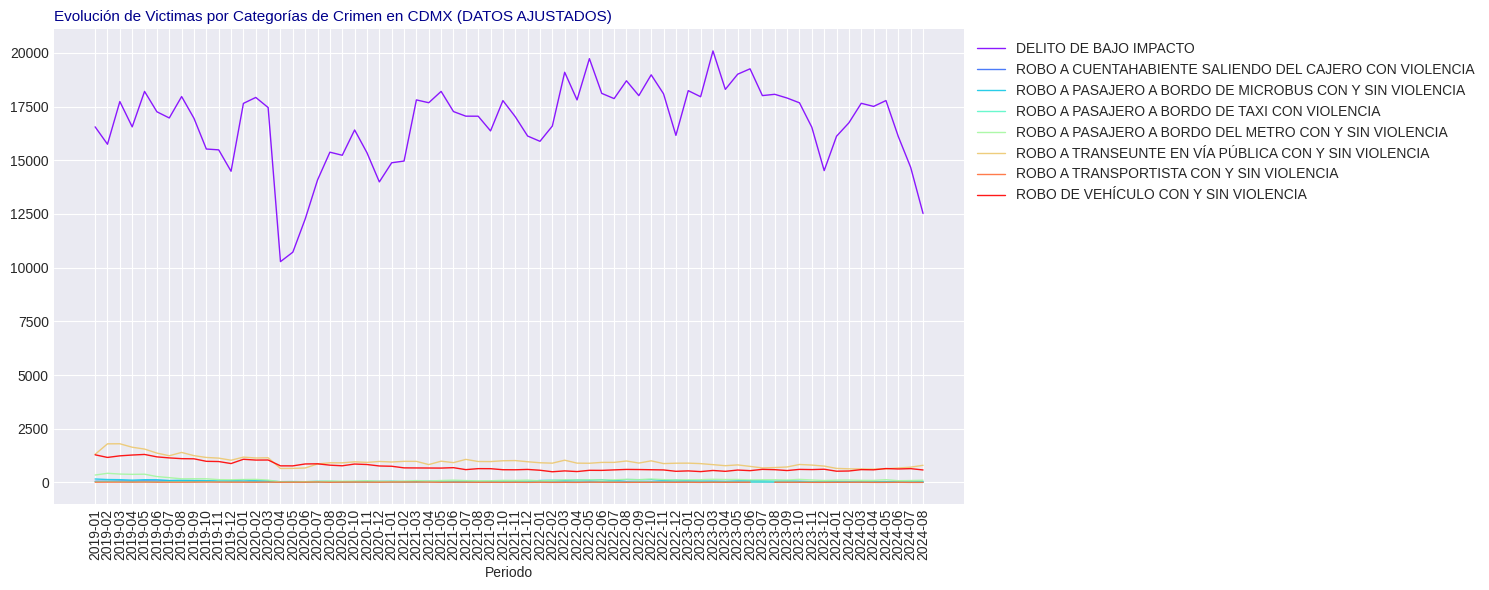

In [13]:
# Visualización

plt.style.use('seaborn-darkgrid') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie.columns) - 1))

# Plot multiple lines
for num, column in enumerate(Time_Serie.drop('Periodo', axis=1)):
    plt.plot(Time_Serie['Periodo'], Time_Serie[column],
             marker='', color=colors[num], linewidth=1,
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS AJUSTADOS)',
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

In [14]:
#

Time_Serie = Time_Serie.drop('DELITO DE BAJO IMPACTO', axis=1)

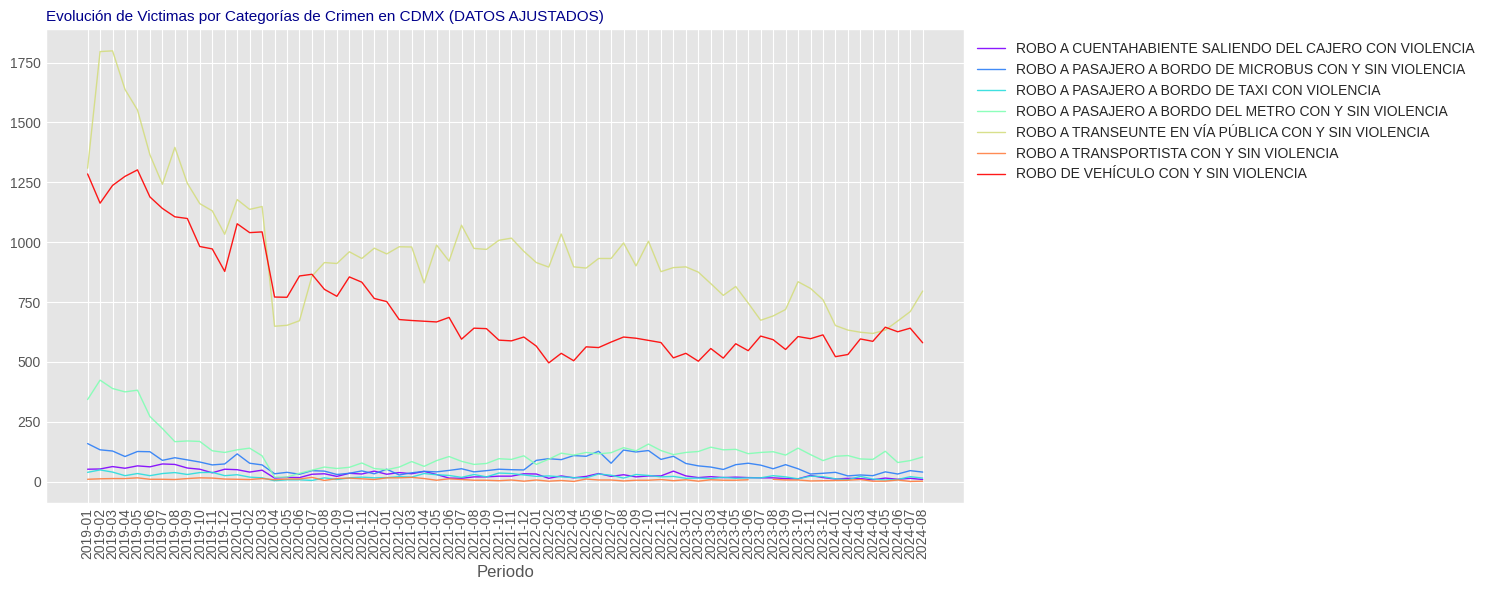

In [15]:
# Visualización

plt.style.use('ggplot') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie.columns) - 1))

# Plot multiple lines
for num, column in enumerate(Time_Serie.drop('Periodo', axis=1)):
    plt.plot(Time_Serie['Periodo'], Time_Serie[column],
             marker='', color=colors[num], linewidth=1,
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS AJUSTADOS)',
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

In [16]:
#

Time_Serie_OLD = Time_Serie_OLD.drop('HECHO NO DELICTIVO', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('SECUESTRO', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('HOMICIDIO DOLOSO', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('VIOLACIÓN', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('ROBO A CASA HABITACIÓN CON VIOLENCIA', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('ROBO A NEGOCIO CON VIOLENCIA', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('ROBO A REPARTIDOR CON Y SIN VIOLENCIA', axis=1)

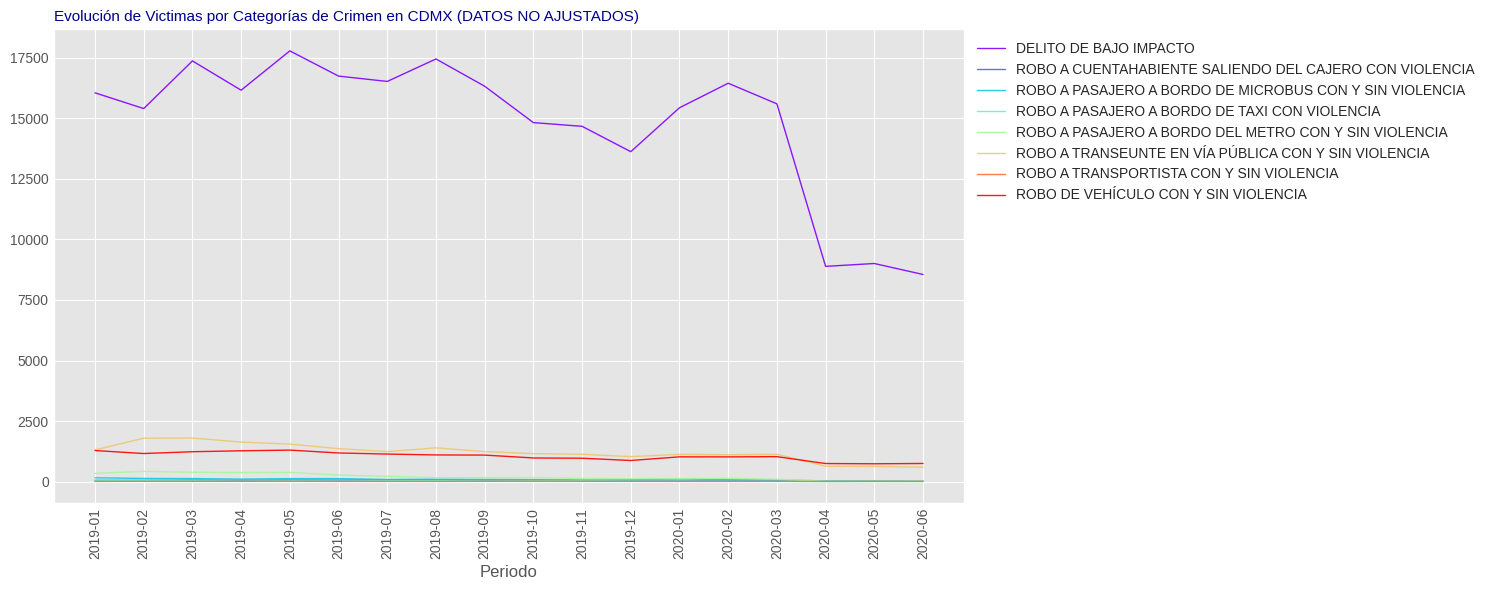

In [17]:
# Visualización

plt.style.use('ggplot') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie_OLD.columns) - 1))

# Plot multiple lines
for num, column in enumerate(Time_Serie_OLD.drop('Periodo', axis=1)):
    plt.plot(Time_Serie_OLD['Periodo'], Time_Serie_OLD[column],
             marker='', color=colors[num], linewidth=1,
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS NO AJUSTADOS)',
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

In [18]:
#

Time_Serie_OLD = Time_Serie_OLD.drop('DELITO DE BAJO IMPACTO', axis=1)

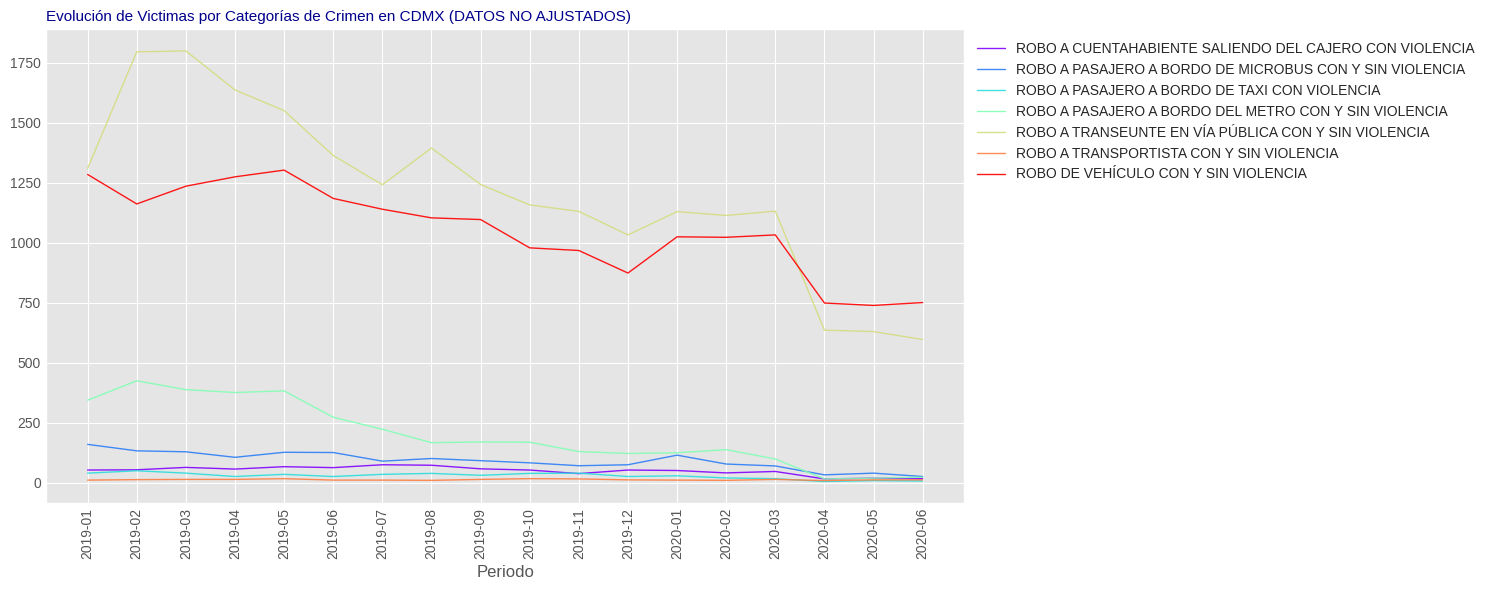

In [19]:
# Visualización

plt.style.use('ggplot') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie_OLD.columns) - 1))

# Plot multiple lines
for num, column in enumerate(Time_Serie_OLD.drop('Periodo', axis=1)):
    plt.plot(Time_Serie_OLD['Periodo'], Time_Serie_OLD[column],
             marker='', color=colors[num], linewidth=1,
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS NO AJUSTADOS)',
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

## SECCIÓN II:

### Limpieza de datos

In [20]:
# Selección de información para el modelo
# Usaremos los DATOS ACTUALIZADOS:

Datos_ML = Datos[ Datos['Periodo'] >= '2019-01' ]

Datos_ML = Datos_ML[ [ 'Periodo','fecha_inicio', 'hora_inicio', 'fecha_hecho', 'hora_hecho', 'categoria_delito',
                       'sexo', 'edad', 'tipo_persona', 'calidad_juridica', 'latitud', 'longitud' ] ]

Datos_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1363706 entries, 3 to 1396173
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Periodo           1363706 non-null  object 
 1   fecha_inicio      1363706 non-null  object 
 2   hora_inicio       1363705 non-null  object 
 3   fecha_hecho       1363706 non-null  object 
 4   hora_hecho        1363705 non-null  object 
 5   categoria_delito  1363706 non-null  object 
 6   sexo              1124079 non-null  object 
 7   edad              904499 non-null   float64
 8   tipo_persona      1356504 non-null  object 
 9   calidad_juridica  1363705 non-null  object 
 10  latitud           1293430 non-null  float64
 11  longitud          1293430 non-null  float64
dtypes: float64(3), object(9)
memory usage: 135.3+ MB


In [22]:
#

Datos_ML.Periodo.value_counts()

,count
Periodo,
2019-05,24096
2019-03,23933
2019-08,23135
2023-03,22865
2019-01,22713
...,...
2020-12,17198
2024-08,15186
2020-06,15137


In [23]:
#

Datos_ML.categoria_delito.value_counts()

,count
categoria_delito,
DELITO DE BAJO IMPACTO,1138218
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,65244
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,50098
ROBO A NEGOCIO CON VIOLENCIA,25682
HECHO NO DELICTIVO,25228
ROBO A REPARTIDOR CON Y SIN VIOLENCIA,12638
VIOLACIÓN,11625
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,8659
HOMICIDIO DOLOSO,7999


In [24]:
#

Datos_ML.tipo_persona.value_counts()

,count
tipo_persona,
FISICA,1104678
MORAL,251826


In [25]:
#

pd.crosstab( Datos_ML['Periodo'], Datos_ML['tipo_persona'] , normalize = 'index' )

tipo_persona,FISICA,MORAL
Periodo,,
2019-01,0.801075,0.198925
2019-02,0.812563,0.187437
2019-03,0.802859,0.197141
2019-04,0.803829,0.196171
2019-05,0.803612,0.196388
...,...,...
2024-04,0.839540,0.160460
2024-05,0.850341,0.149659
2024-06,0.839069,0.160931


In [26]:
#

Datos_ML = Datos_ML[ Datos_ML['tipo_persona'] != 'MORAL' ]

In [27]:
#

Datos_ML.calidad_juridica.value_counts()

,count
calidad_juridica,
VICTIMA Y DENUNCIANTE,514719
DENUNCIANTE Y VICTIMA,376828
VICTIMA,115682
LESIONADO,46610
CADAVER,29745
OFENDIDO,18688
OFENDIDO Y DENUNCIANTE,8137
AGRAVIADO,1468
VICTIMA NIÑO,1


In [28]:
#
Datos_ML['personas'] = 'NA'
#
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'VICTIMA Y DENUNCIANTE', 'personas'] = 'Victima_y_Otra'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'OFENDIDO Y DENUNCIANTE', 'personas'] = 'Victima_y_Otra'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'DENUNCIANTE Y VICTIMA', 'personas'] = 'Victima_y_Otra'
#
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'VICTIMA', 'personas'] = 'Victima'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'OFENDIDO', 'personas'] = 'Victima'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'AGRAVIADO', 'personas'] = 'Victima'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'LESIONADO', 'personas'] = 'Victima'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'CADAVER', 'personas'] = 'Victima'

#Datos_ML.personas.value_counts()
Datos_ML = Datos_ML[ Datos_ML['personas'] != 'NA' ]

In [29]:
#

Datos_ML.personas.value_counts()

,count
personas,
Victima_y_Otra,899684
Victima,212193


In [30]:
# Creamos una variable de días

Datos_ML['Dias'] = ( pd.to_timedelta(
                     pd.to_datetime( Datos_ML['fecha_inicio'] + '-' + Datos_ML['hora_inicio'],
                                     format = '%Y-%m-%d-%H:%M:%S' ) - \
                     pd.to_datetime( Datos_ML['fecha_hecho'] + '-' + Datos_ML['hora_hecho'],
                                     format = '%Y-%m-%d-%H:%M:%S' )
                   ).dt.total_seconds() / 3600 ) / 24

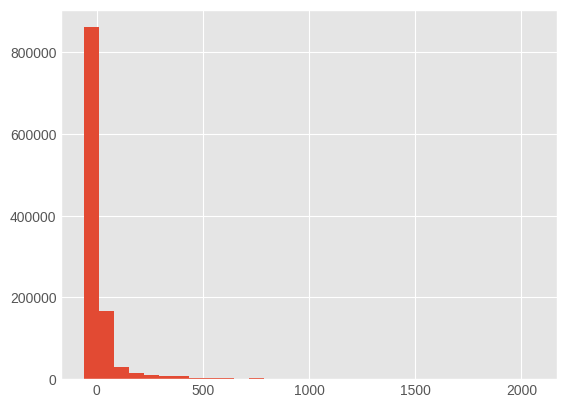

In [31]:
# Un histograma

Datos_ML['Dias'].hist( bins = 30 )

plt.show()

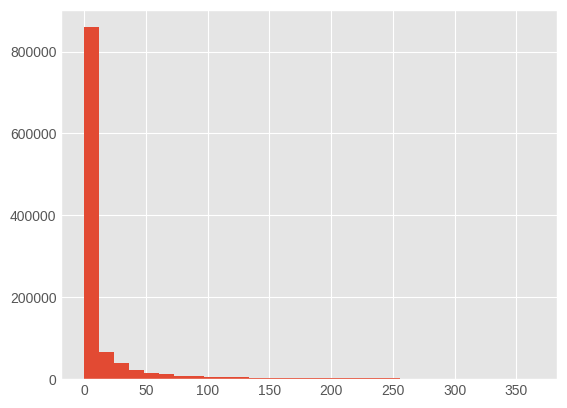

In [32]:
# Filtramos casos en los que no transcurrió más de 1 año entre la denuncia y el evento:

Datos_ML = Datos_ML[ ( Datos_ML['Dias'] >= 0 ) & ( Datos_ML['Dias'] <= 365 ) ]

Datos_ML['Dias'].hist( bins = 30 )

plt.show()

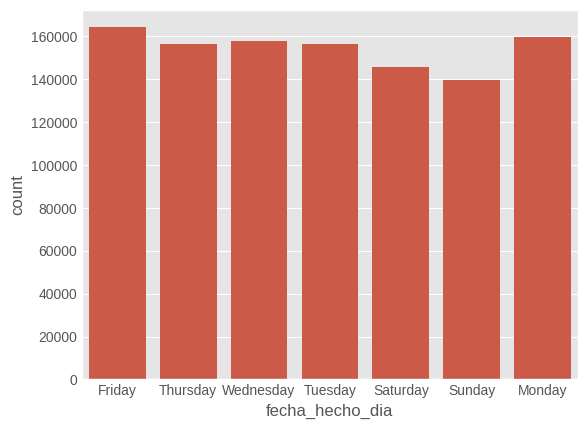

In [33]:
#
# Extraer el día de la semana

Datos_ML['fecha_hecho_dia'] = pd.to_datetime( Datos_ML['fecha_hecho'] ).dt.day_name()

#Datos_ML['fecha_hecho_dia'].hist( bins = 7 )

sn.countplot(x = "fecha_hecho_dia",data=Datos_ML)

plt.show()

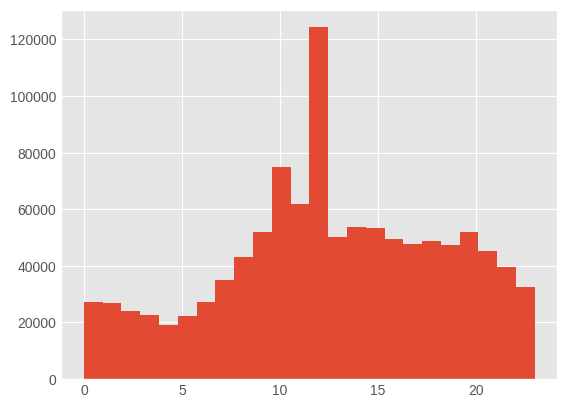

In [34]:
#
# Extraer hora

Datos_ML['hora_hecho_hora'] = pd.to_datetime( Datos_ML['hora_hecho'] ).dt.hour

Datos_ML['hora_hecho_hora'].hist( bins = 24 )

plt.show()

In [35]:
#

Datos_ML.sexo.value_counts()

,count
sexo,
Masculino,554225
Femenino,518606
No se especifica,1


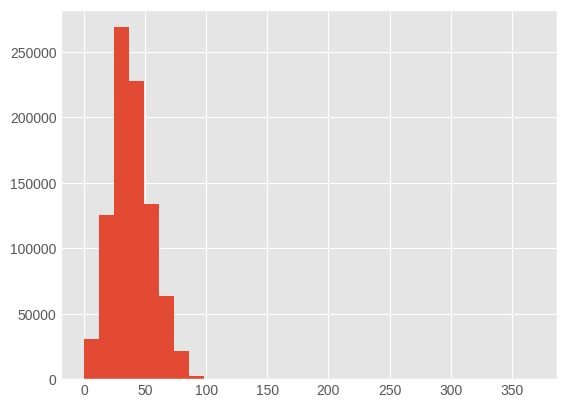

In [36]:
#

Datos_ML['edad'].hist( bins = 30 )

plt.show()

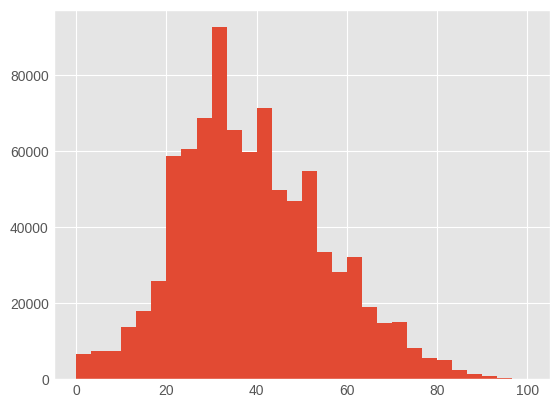

In [37]:
# Filtramos casos en los que no transcurrió más de 1 año entre la denuncia y el evento:

Datos_ML = Datos_ML[ ( Datos_ML['edad'] >= 0 ) & ( Datos_ML['edad'] <= 100 ) ]

Datos_ML['edad'].hist( bins = 30 )

plt.show()

In [38]:
#

Datos_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873893 entries, 3 to 1396173
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Periodo           873893 non-null  object 
 1   fecha_inicio      873893 non-null  object 
 2   hora_inicio       873893 non-null  object 
 3   fecha_hecho       873893 non-null  object 
 4   hora_hecho        873893 non-null  object 
 5   categoria_delito  873893 non-null  object 
 6   sexo              873122 non-null  object 
 7   edad              873893 non-null  float64
 8   tipo_persona      873307 non-null  object 
 9   calidad_juridica  873893 non-null  object 
 10  latitud           838240 non-null  float64
 11  longitud          838240 non-null  float64
 12  personas          873893 non-null  object 
 13  Dias              873893 non-null  float64
 14  fecha_hecho_dia   873893 non-null  object 
 15  hora_hecho_hora   873893 non-null  int32  
dtypes: float64(4), int32(1),

In [39]:
# Filtramos casos en los que no hay datos de longitud y latitud:

#Datos_ML[ ( Datos_ML['latitud'].isnull() ) | ( Datos_ML['longitud'].isnull() ) ]

Datos_ML = Datos_ML[ ( Datos_ML['latitud'].notnull() ) | ( Datos_ML['longitud'].notnull() ) ]

Datos_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838240 entries, 3 to 1396173
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Periodo           838240 non-null  object 
 1   fecha_inicio      838240 non-null  object 
 2   hora_inicio       838240 non-null  object 
 3   fecha_hecho       838240 non-null  object 
 4   hora_hecho        838240 non-null  object 
 5   categoria_delito  838240 non-null  object 
 6   sexo              837512 non-null  object 
 7   edad              838240 non-null  float64
 8   tipo_persona      837692 non-null  object 
 9   calidad_juridica  838240 non-null  object 
 10  latitud           838240 non-null  float64
 11  longitud          838240 non-null  float64
 12  personas          838240 non-null  object 
 13  Dias              838240 non-null  float64
 14  fecha_hecho_dia   838240 non-null  object 
 15  hora_hecho_hora   838240 non-null  int32  
dtypes: float64(4), int32(1),

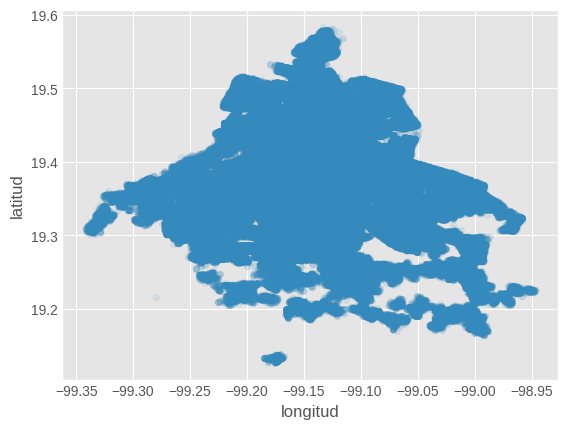

In [40]:
#

Datos_ML.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.1)

plt.show()

In [41]:
#

Datos_ML = Datos_ML[ [ 'Periodo', 'categoria_delito', 'fecha_inicio', 'hora_inicio',
                       'fecha_hecho', 'hora_hecho', 'fecha_hecho_dia', 'hora_hecho_hora',
                       'sexo', 'edad', 'personas', 'Dias', 'latitud', 'longitud' ] ]

In [42]:
#

Datos.shape, Datos_ML.shape, 100 * Datos_ML.shape[0] / Datos.shape[0]

((1396174, 23), (838240, 14), 60.03836198067003)

## SECCIÓN III:

### Selección de datos

* Usemos los datos previos a Julio de 2020 para entrenar un modelo que permita clasificar "ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA"

In [43]:
# Agrupamos por año-mes y categoria_delito de los DATOS ACTUALIZADOS

Time_Serie_ML = Datos_ML[ ['Periodo', 'categoria_delito',
                           'fecha_inicio'] ].groupby(
                                 by = ['Periodo','categoria_delito']
                           ).count().reset_index( drop = False).rename(
                                   columns = {'categoria_delito': 'Categoria',
                                              'fecha_inicio' : 'Numero'} )

Time_Serie_ML

,Periodo,Categoria,Numero
0,2019-01,DELITO DE BAJO IMPACTO,9889
1,2019-01,HECHO NO DELICTIVO,167
2,2019-01,HOMICIDIO DOLOSO,143
3,2019-01,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,71
4,2019-01,ROBO A CASA HABITACIÓN CON VIOLENCIA,45
...,...,...,...
1040,2024-08,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,75
1041,2024-08,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,3
1042,2024-08,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,627
1043,2024-08,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,405


In [44]:
#

Time_Serie_ML = pd.pivot_table( Time_Serie_ML, values = 'Numero', index = ['Periodo'],
                                columns = ['Categoria'], aggfunc = 'sum' ).reset_index( drop = False )

Time_Serie_ML

Categoria,Periodo,DELITO DE BAJO IMPACTO,HECHO NO DELICTIVO,HOMICIDIO DOLOSO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,ROBO A CASA HABITACIÓN CON VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SECUESTRO,VIOLACIÓN
0,2019-01,9889.0,167.0,143.0,71.0,45.0,41.0,330.0,138.0,33.0,285.0,99.0,1053.0,5.0,1098.0,15.0,58.0
1,2019-02,9757.0,198.0,129.0,85.0,64.0,45.0,268.0,113.0,46.0,339.0,65.0,1426.0,2.0,1015.0,2.0,74.0
2,2019-03,10821.0,141.0,145.0,75.0,57.0,51.0,269.0,97.0,32.0,306.0,57.0,1387.0,2.0,1070.0,6.0,87.0
3,2019-04,9993.0,171.0,138.0,65.0,56.0,43.0,237.0,79.0,17.0,295.0,50.0,1272.0,6.0,1055.0,1.0,94.0
4,2019-05,11193.0,172.0,183.0,72.0,59.0,53.0,233.0,104.0,26.0,281.0,59.0,1214.0,7.0,1073.0,8.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2024-04,11480.0,358.0,100.0,34.0,6.0,7.0,9.0,22.0,5.0,60.0,10.0,498.0,NaN,394.0,1.0,130.0
64,2024-05,12041.0,356.0,103.0,35.0,13.0,15.0,6.0,34.0,7.0,96.0,5.0,508.0,NaN,456.0,1.0,146.0
65,2024-06,10655.0,308.0,87.0,38.0,18.0,8.0,7.0,23.0,7.0,57.0,15.0,544.0,NaN,451.0,NaN,120.0
66,2024-07,9914.0,293.0,78.0,22.0,33.0,13.0,8.0,33.0,15.0,59.0,8.0,551.0,NaN,481.0,NaN,99.0


In [45]:
#
Time_Serie_ML = Time_Serie_ML.drop('HECHO NO DELICTIVO', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('SECUESTRO', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('HOMICIDIO DOLOSO', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('VIOLACIÓN', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('ROBO A CASA HABITACIÓN CON VIOLENCIA', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('ROBO A NEGOCIO CON VIOLENCIA', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('ROBO A REPARTIDOR CON Y SIN VIOLENCIA', axis=1)

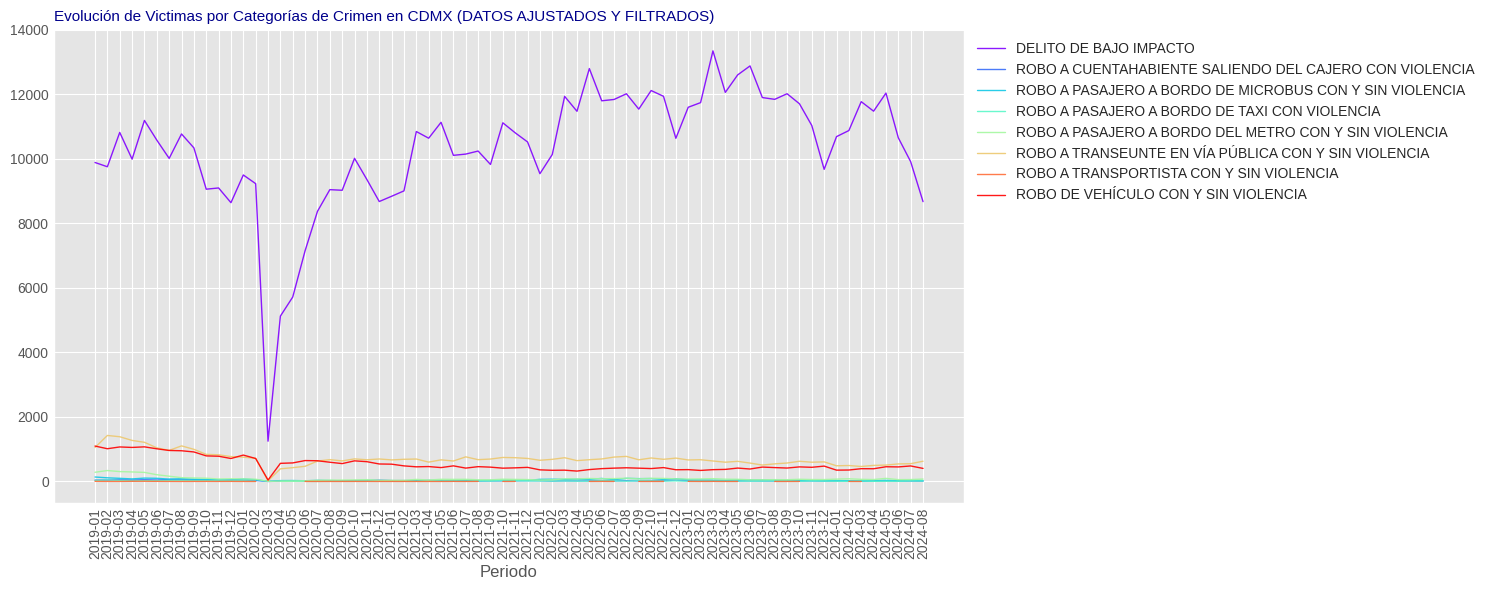

In [46]:
# Visualización

plt.style.use('ggplot') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie_ML.columns) - 1))

# Plot multiple lines
for num, column in enumerate(Time_Serie_ML.drop('Periodo', axis=1)):
    plt.plot(Time_Serie_ML['Periodo'], Time_Serie_ML[column],
             marker='', color=colors[num], linewidth=1,
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS AJUSTADOS Y FILTRADOS)',
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

In [47]:
#

Time_Serie_ML = Time_Serie_ML.drop('DELITO DE BAJO IMPACTO', axis=1)

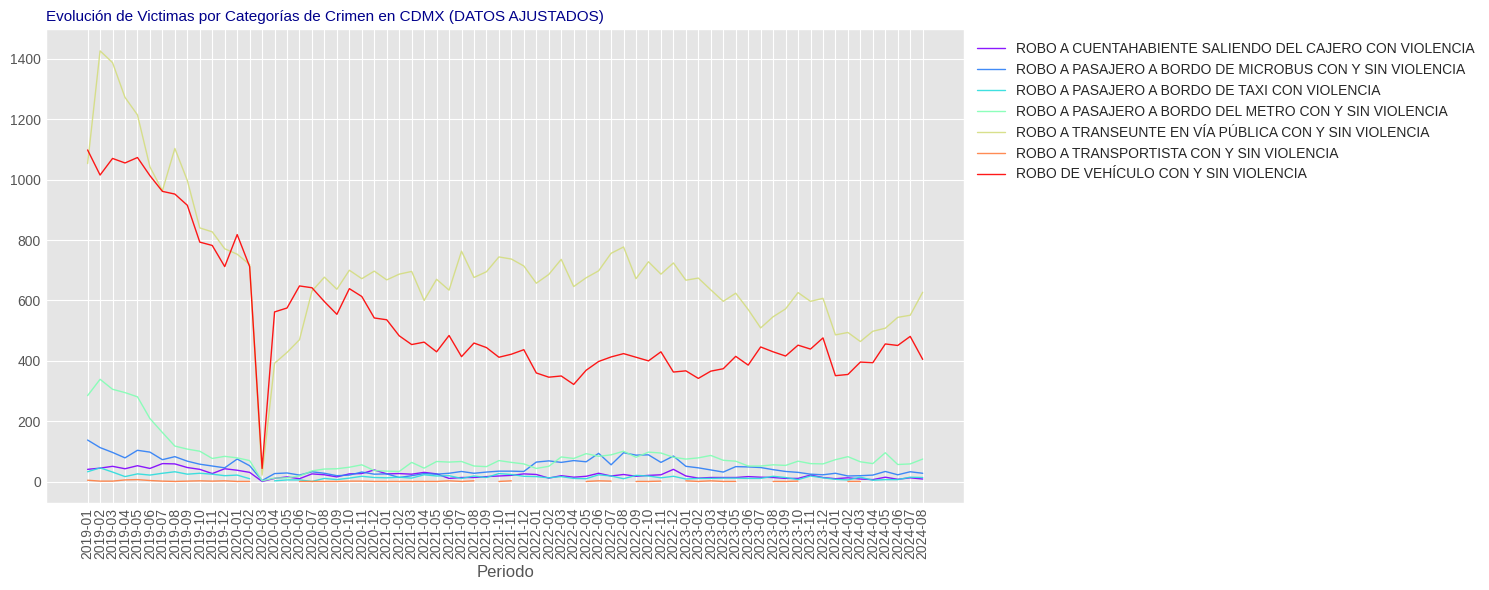

In [48]:
# Visualización

plt.style.use('ggplot') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie_ML.columns) - 1))

# Plot multiple lines
for num, column in enumerate(Time_Serie_ML.drop('Periodo', axis=1)):
    plt.plot(Time_Serie_ML['Periodo'], Time_Serie_ML[column],
             marker='', color=colors[num], linewidth=1,
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS AJUSTADOS)',
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

In [49]:
# Selección de información para el modelo

# Usaremos los DATOS ACTUALIZADOS de 2019 como conjunto para entrenar y probar nuestro modelo:

Datos_01 = Datos_ML[ ( Datos_ML['Periodo'] >= '2019-01' ) & \
                     ( Datos_ML['Periodo'] <= '2019-12' ) ].reset_index( drop = True )

# Usaremos los DATOS ACTUALIZADOS de 2023 como conjunto para reclasificar delitos con nuestro modelo:

Datos_02 = Datos_ML[ ( Datos_ML['Periodo'] >= '2023-01' ) & \
                     ( Datos_ML['Periodo'] <= '2023-12' ) ].reset_index( drop = True )

#
Datos_01.shape, Datos_02.shape, 100*Datos_01.shape[0]/Datos_ML.shape[0], 100*Datos_02.shape[0]/Datos_ML.shape[0]

((158380, 14), (163390, 14), 18.89435006680664, 19.492030921931665)

In [50]:
#

Datos_01 = pd.concat( [ Datos_01, pd.get_dummies( Datos_01['sexo'], dtype = float) ], axis = 1 )

Datos_01 = pd.concat( [ Datos_01, pd.get_dummies( Datos_01['personas'], dtype = float) ], axis = 1 )

Datos_01 = pd.concat( [ Datos_01, pd.get_dummies( Datos_01['fecha_hecho_dia'].astype(str), dtype = float) ], axis = 1 )

Datos_01 = pd.concat( [ Datos_01, pd.get_dummies( Datos_01['hora_hecho_hora'].astype(str), dtype = float) ], axis = 1 )

Datos_01 = Datos_01[ [ 'Periodo', 'categoria_delito', 'fecha_hecho', 'hora_hecho',
                       'fecha_hecho_dia', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                       'Friday', 'Saturday', 'Sunday', 'hora_hecho_hora', '0', '1', '2',
                       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
                       '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Dias',
                       'sexo', 'Femenino', 'Masculino', 'edad', 'personas', 'Victima',
                       'Victima_y_Otra', 'latitud', 'longitud',] ]

In [51]:
#

Datos_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158380 entries, 0 to 158379
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Periodo           158380 non-null  object 
 1   categoria_delito  158380 non-null  object 
 2   fecha_hecho       158380 non-null  object 
 3   hora_hecho        158380 non-null  object 
 4   fecha_hecho_dia   158380 non-null  object 
 5   Monday            158380 non-null  float64
 6   Tuesday           158380 non-null  float64
 7   Wednesday         158380 non-null  float64
 8   Thursday          158380 non-null  float64
 9   Friday            158380 non-null  float64
 10  Saturday          158380 non-null  float64
 11  Sunday            158380 non-null  float64
 12  hora_hecho_hora   158380 non-null  int32  
 13  0                 158380 non-null  float64
 14  1                 158380 non-null  float64
 15  2                 158380 non-null  float64
 16  3                 15

In [52]:
#

Datos_02 = pd.concat( [ Datos_02, pd.get_dummies( Datos_02['sexo'], dtype = float) ], axis = 1 )

Datos_02 = pd.concat( [ Datos_02, pd.get_dummies( Datos_02['personas'], dtype = float) ], axis = 1 )

Datos_02 = pd.concat( [ Datos_02, pd.get_dummies( Datos_02['fecha_hecho_dia'].astype(str), dtype = float) ], axis = 1 )

Datos_02 = pd.concat( [ Datos_02, pd.get_dummies( Datos_02['hora_hecho_hora'].astype(str), dtype = float) ], axis = 1 )

Datos_02 = Datos_02[ [ 'Periodo', 'categoria_delito', 'fecha_hecho', 'hora_hecho',
                       'fecha_hecho_dia', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                       'Friday', 'Saturday', 'Sunday', 'hora_hecho_hora', '0', '1', '2',
                       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
                       '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Dias',
                       'sexo', 'Femenino', 'Masculino', 'edad', 'personas', 'Victima',
                       'Victima_y_Otra', 'latitud', 'longitud',] ]

In [53]:
#

Datos_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163390 entries, 0 to 163389
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Periodo           163390 non-null  object 
 1   categoria_delito  163390 non-null  object 
 2   fecha_hecho       163390 non-null  object 
 3   hora_hecho        163390 non-null  object 
 4   fecha_hecho_dia   163390 non-null  object 
 5   Monday            163390 non-null  float64
 6   Tuesday           163390 non-null  float64
 7   Wednesday         163390 non-null  float64
 8   Thursday          163390 non-null  float64
 9   Friday            163390 non-null  float64
 10  Saturday          163390 non-null  float64
 11  Sunday            163390 non-null  float64
 12  hora_hecho_hora   163390 non-null  int32  
 13  0                 163390 non-null  float64
 14  1                 163390 non-null  float64
 15  2                 163390 non-null  float64
 16  3                 16

In [54]:
#

Datos_01.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,hora_hecho_hora,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Dias,Femenino,Masculino,edad,Victima,Victima_y_Otra,latitud,longitud
count,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000
mean,0.144665,0.146066,0.144128,0.144204,0.153271,0.140428,0.127238,13.595056,0.020362,0.018273,0.015090,0.014465,0.012754,0.016063,0.024403,0.032776,0.039683,0.044570,0.055493,0.054066,0.075950,0.054691,0.058101,0.058391,0.054502,0.050612,0.054167,0.053132,0.058644,0.052772,0.045833,0.035206,8.717484,0.448737,0.548807,39.210317,0.191615,0.808385,19.384425,-99.135133
std,0.351764,0.353174,0.351221,0.351297,0.360249,0.347432,0.333241,5.853857,0.141237,0.133936,0.121913,0.119399,0.112212,0.125717,0.154298,0.178049,0.195214,0.206358,0.228941,0.226149,0.264919,0.227377,0.233935,0.234482,0.227006,0.219206,0.226348,0.224297,0.234957,0.223578,0.209123,0.184302,30.986192,0.497367,0.497614,15.897564,0.393573,0.393573,0.071327,0.061790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.130790,-99.341145
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171528,0.000000,0.000000,28.000000,0.000000,1.000000,19.335230,-99.175860
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.786111,0.000000,1.000000,37.000000,0.000000,1.000000,19.385200,-99.140073
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.258073,1.000000,1.000000,49.000000,0.000000,1.000000,19.437510,-99.095149
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,364.998611,1.000000,1.000000,100.000000,1.000000,1.000000,19.581110,-98.948320


In [55]:
#

Datos_02.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,hora_hecho_hora,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Dias,Femenino,Masculino,edad,Victima,Victima_y_Otra,latitud,longitud
count,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.00000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000,163390.000000
mean,0.145039,0.142371,0.146037,0.143430,0.145811,0.135186,0.142126,12.208048,0.016090,0.030816,0.029010,0.026446,0.023221,0.026795,0.031367,0.040510,0.048779,0.053541,0.068707,0.063590,0.087459,0.041820,0.046514,0.045645,0.04406,0.042408,0.041814,0.042206,0.048253,0.040357,0.033086,0.027505,12.134696,0.524714,0.475219,39.367281,0.136734,0.863266,19.381218,-99.134894
std,0.352142,0.349431,0.353144,0.350512,0.352917,0.341923,0.349181,6.046376,0.125823,0.172819,0.167836,0.160458,0.150604,0.161484,0.174307,0.197154,0.215406,0.225110,0.252956,0.244022,0.282508,0.200179,0.210597,0.208715,0.20523,0.201518,0.200165,0.201059,0.214300,0.196797,0.178863,0.163549,37.213421,0.499390,0.499387,16.274216,0.343568,0.343568,0.073674,0.063785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.126574,-99.341338
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288947,0.000000,0.000000,28.000000,0.000000,1.000000,19.328609,-99.174980
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.409149,1.000000,0.000000,37.000000,0.000000,1.000000,19.383486,-99.138284
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.229337,1.000000,1.000000,50.000000,0.000000,1.000000,19.436382,-99.093855
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,364.997222,1.000000,1.000000,100.000000,1.000000,1.000000,19.579410,-98.948363


## SECCIÓN IV:

### Modelado

* Usemos los datos previos a Julio de 2020 para entrenar un modelo que permita clasificar "ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA"

* Plantearemos un modelo de respuesta binaria:

Este tipo de modelos suponene que existe una variable latente que se puede expresar como una ecuación lineal dada por:
$$y^*_i = \mathbf{x}_i \boldsymbol{\beta} + \varepsilon_i$$

Donde $\varepsilon_i$ es una variable aleatoria con función de densidad con media cero y distribución simetrica al rededor de cero. Dado lo anterior, para nosotros sólo es visible que:
\begin{equation*}
    y_i =
    \begin{cases}
        1 & \text{si } y^*_i > 0 \\
        0 & \text{si } y^*_i < 0
    \end{cases}
\end{equation*}

Visto en nuestro caso, podemos pensar que estamos ante algo como:
\begin{equation*}
    y_i =
    \begin{cases}
        \text{ ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA } & \text{si } y^*_i > 0 \\
        \text{ OTRO CASO } & \text{si } y^*_i < 0
    \end{cases}
\end{equation*}

De esta forma tenemos una estrucutura de la probabilidad dada por:
\begin{eqnarray*}
    P(y_i = 1 | \mathbf{x}_i) & = & P(\mathbf{x}_i \boldsymbol{\beta} + \varepsilon_i > 0) = P(\varepsilon_i > - \mathbf{x}_i \boldsymbol{\beta}) = G(\mathbf{x}_i \boldsymbol{\beta}) \\
    P(y_i = 0 | \mathbf{x}_i) & = & P(\mathbf{x}_i \boldsymbol{\beta} + \varepsilon_i < 0) = P(\varepsilon_i < - \mathbf{x}_i \boldsymbol{\beta}) = 1 - G(\mathbf{x}_i \boldsymbol{\beta})
\end{eqnarray*}

Donde $\mathbf{x}_i$ es un vector de dimensión $K \times 1$ que contiene al menos el término constante y $\boldsymbol{\beta}$ es un vector de parámetros a estimar, de forma que asumiremos:
\begin{equation*}
    \mathbf{x}_i \boldsymbol{\beta} = \beta_1 + x_{i2} \beta_2 + \ldots + x_{iK} \beta_K
\end{equation*}

Asumiremos que $G(\cdot)$ es uan función de densidad acumulada de forma que:
\begin{equation*}
    0< G(\mathbf{x}_i \boldsymbol{\beta}) < 1 \text{ , } \forall \mathbf{x}_i \boldsymbol{\beta} \in \mathbb{R}
\end{equation*}

En este caso utilizaremos dos modelos que dependen de la forma funcional de $G(\cdot)$ que está determinada por la distribución de $\varepsilon_i$. De esta forma tendremos dos modelos: Probit y Logit.

In [56]:
# Seleccionamos solo los casos de interés para Dataset 01

Datos_01 = Datos_01[ ( Datos_01['categoria_delito'] == 'DELITO DE BAJO IMPACTO' ) | \
                     ( Datos_01['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA' ) ]

# Variable categórica:
Datos_01[ 'Delito' ] = 0

Datos_01.loc[ Datos_01['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 'Delito'] = 1

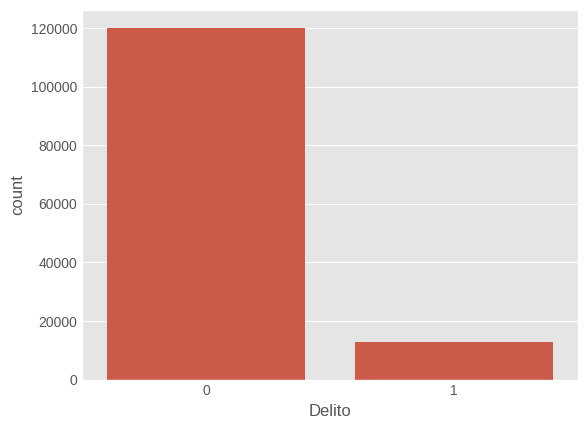

In [57]:
#

sn.countplot( x = 'Delito', data = Datos_01)

plt.show()

In [ ]:
#
Datos_01.Delito.describe()

count    133067.000000
mean          0.096906
std           0.295831
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Delito, dtype: float64

In [58]:
# Seleccionamos solo los casos de interés para Dataset 02

Datos_02 = Datos_02[ ( Datos_02['categoria_delito'] == 'DELITO DE BAJO IMPACTO' ) | \
                     ( Datos_02['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA' ) ]

# Variable categórica:
Datos_02[ 'Delito' ] = 0

Datos_02.loc[ Datos_02['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 'Delito'] = 1

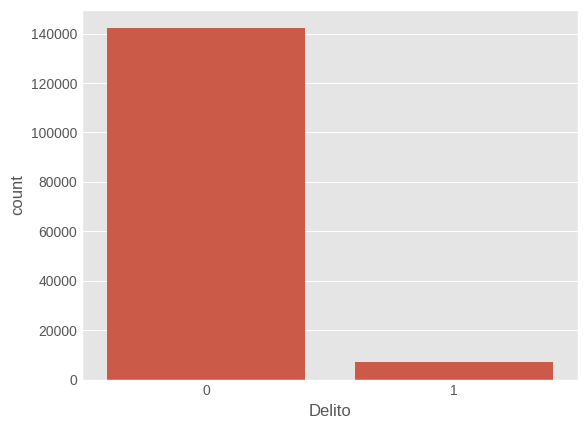

In [59]:
#

sn.countplot( x = 'Delito', data = Datos_02)

plt.show()

In [60]:
#
Datos_02.Delito.describe()

,Delito
count,149661.000000
mean,0.048269
std,0.214335
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Logistic Regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [61]:
# Add constant

Datos_01[ 'Constante' ] = 1

In [62]:
# Selecciones las columnas de nuestra regresión:

Datos_01.columns

Index(['Periodo', 'categoria_delito', 'fecha_hecho', 'hora_hecho',
       'fecha_hecho_dia', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'hora_hecho_hora', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', 'Dias', 'sexo', 'Femenino',
       'Masculino', 'edad', 'personas', 'Victima', 'Victima_y_Otra', 'latitud',
       'longitud', 'Delito', 'Constante'],
      dtype='object')

In [63]:
# Model

model = sm.Logit(
    Datos_01.Delito, # Y
    Datos_01[[ 'Constante',
               'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', # Quitamos el domingo
               '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
               '15', '16', '17', '18', '19', '20', '21', '22', '23', # Quitamos la hora 0
               'Femenino', # Quitamos la dummy de masculino
               'Victima', # Quitamos la dummy de cuando la denuncia la hace alguien más que la victima
               'Dias', 'edad', 'latitud', 'longitud']]
)

result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.281793
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Delito   No. Observations:               133067
Model:                          Logit   Df Residuals:                   133031
Method:                           MLE   Df Model:                           35
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.1145
Time:                        23:39:31   Log-Likelihood:                -37497.
converged:                       True   LL-Null:                       -42346.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constante    372.5574     15.873     23.472      0.000     341.448     403.667
Monday         0.3152      0.038      8.316      0.000       0.241       0.390
Tuesday        0.2233      0.038      5.816      0.000       0.148       0.299
Wednesday      0.2194      0.039      5.685      0.000       0.144       0.295
Thursday       0.2245      0.039      5.815      0.000       0.149       0.300
Friday         0.2056      0.038      5.433      0.000       0.131       0.280
Saturday       0.1870      0.038      4.861      0.000       0.112       0.262
1             -0.1352      0.094     -1.431      0.152      -0.320       0.050
2             -0.2086      0.103     -2.029      0.043      -0.410      -0.007
3             -0.3302      0.105     -3.130      0.002      -0.537      -0.123
4             -0.0119      0.102     -0.116      0.907      -0.212       0.188
5              0.2423      0.094      2.586      0.010       0.059       0.426
6              0.2546      0.084      3.021      0.003       0.089       0.420
7             -0.2405      0.085     -2.834      0.005      -0.407      -0.074
8             -0.4448      0.084     -5.299      0.000      -0.609      -0.280
9             -0.5092      0.083     -6.134      0.000      -0.672      -0.346
10            -0.4876      0.080     -6.085      0.000      -0.645      -0.331
11            -0.3159      0.078     -4.036      0.000      -0.469      -0.162
12            -0.4543      0.077     -5.904      0.000      -0.605      -0.303
13            -0.0145      0.076     -0.192      0.848      -0.163       0.134
14            -0.1659      0.076     -2.182      0.029      -0.315      -0.017
15            -0.1340      0.076     -1.771      0.077      -0.282       0.014
16            -0.1486      0.076     -1.946      0.052      -0.298       0.001
17            -0.2353      0.078     -3.013      0.003      -0.388      -0.082
18            -0.3019      0.078     -3.875      0.000      -0.455      -0.149
19            -0.0866      0.076     -1.138      0.255      -0.236       0.063
20            -0.0442      0.075     -0.590      0.555      -0.191       0.102
21             0.0875      0.075      1.166      0.244      -0.060       0.235
22             0.0207      0.077      0.270      0.787      -0.129       0.171
23             0.0036      0.080      0.045      0.964      -0.153       0.161
Femenino      -0.7415      0.020    -36.951      0.000      -0.781      -0.702
Victima       -2.2916      0.048    -48.030      0.000      -2.385      -2.198
Dias          -0.0248      0.001    -20.197      0.000      -0.027      -0.022
edad          -0.0350      0.001    -45.831      0.000      -0.037      -0.034
latitud        2.7910      0.142     19.720      0.000       2.514       3.068
longitud       4.3072      0.164     26.334      0.000       3.987       4.628
==============================================================================
"""

In [64]:
#

print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 Delito   No. Observations:               133067
Model:                          Logit   Df Residuals:                   133031
Method:                           MLE   Df Model:                           35
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.1145
Time:                        23:39:36   Log-Likelihood:                -37497.
converged:                       True   LL-Null:                       -42346.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constante    372.5574     15.873     23.472      0.000     341.448     403.667
Monday         0.3152      0.038      8.316      0.000       0.241       0.390
Tuesday        0.2233      0.038      5.816      0.0

In [65]:
#

Datos_01_train, Datos_01_test = train_test_split( Datos_01[ Datos_01['Delito'] == 0 ],
                                                  test_size = 0.68, random_state = 42 )

Datos_01_train = pd.concat( [ Datos_01[ Datos_01['Delito'] == 1 ], Datos_01_train ], ignore_index = True )

#Datos_01_train

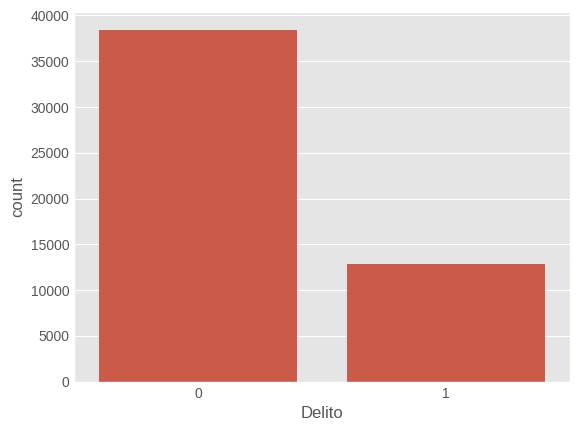

In [66]:
#

sn.countplot( x = 'Delito', data = Datos_01_train)

plt.show()

In [67]:
#
Datos_01_train.Delito.describe()

,Delito
count,51350.000000
mean,0.251120
std,0.433661
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [68]:
#
Datos_01_train.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,hora_hecho_hora,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Dias,Femenino,Masculino,edad,Victima,Victima_y_Otra,latitud,longitud,Delito,Constante
count,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.0
mean,0.146056,0.146368,0.143038,0.142395,0.154528,0.142142,0.125472,13.690185,0.019357,0.017683,0.014742,0.013301,0.012717,0.015209,0.022726,0.031159,0.037644,0.043135,0.055463,0.055054,0.076981,0.056319,0.060701,0.059396,0.057799,0.050730,0.053982,0.051665,0.059552,0.053749,0.046329,0.034606,8.621312,0.464284,0.533165,38.375073,0.166310,0.833690,19.385811,-99.134338,0.251120,1.0
std,0.353166,0.353478,0.350115,0.349459,0.361457,0.349199,0.331257,5.790775,0.137779,0.131796,0.120519,0.114561,0.112050,0.122386,0.149031,0.173748,0.190335,0.203164,0.228883,0.228087,0.266565,0.230540,0.238784,0.236367,0.233366,0.219449,0.225985,0.221352,0.236657,0.225523,0.210199,0.182781,30.781959,0.498728,0.498904,15.639999,0.372362,0.372362,0.070578,0.061564,0.433661,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.130893,-99.339686,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161111,0.000000,0.000000,27.000000,0.000000,1.000000,19.337950,-99.175150,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.804763,0.000000,1.000000,36.000000,0.000000,1.000000,19.387240,-99.139110,0.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.308576,1.000000,1.000000,48.000000,0.000000,1.000000,19.437931,-99.094853,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,364.994954,1.000000,1.000000,100.000000,1.000000,1.000000,19.579550,-98.949310,1.000000,1.0


In [69]:
#
Datos_01.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,hora_hecho_hora,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Dias,Femenino,Masculino,edad,Victima,Victima_y_Otra,latitud,longitud,Delito,Constante
count,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.0
mean,0.144784,0.146212,0.143604,0.142552,0.153652,0.141154,0.128041,13.619718,0.019171,0.017487,0.014316,0.013790,0.011874,0.013707,0.021515,0.030443,0.037973,0.045383,0.058542,0.056490,0.082297,0.057107,0.060887,0.060571,0.056618,0.051485,0.054409,0.052440,0.056753,0.049501,0.043925,0.033314,9.707289,0.486822,0.510630,39.405720,0.192933,0.807067,19.384204,-99.136739,0.096906,1.0
std,0.351884,0.353320,0.350689,0.349617,0.360616,0.348182,0.334136,5.719114,0.137126,0.131079,0.118791,0.116619,0.108318,0.116274,0.145096,0.171804,0.191133,0.208144,0.234766,0.230867,0.274818,0.232047,0.239123,0.238543,0.231112,0.220986,0.226823,0.222913,0.231372,0.216913,0.204930,0.179456,32.860130,0.499828,0.499889,16.143771,0.394602,0.394602,0.071028,0.061567,0.295831,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.130790,-99.341145,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187894,0.000000,0.000000,28.000000,0.000000,1.000000,19.335170,-99.176840,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.000000,1.000000,38.000000,0.000000,1.000000,19.385430,-99.141580,0.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.933501,1.000000,1.000000,50.000000,0.000000,1.000000,19.437022,-99.097415,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,364.994954,1.000000,1.000000,100.000000,1.000000,1.000000,19.581110,-98.948320,1.000000,1.0


In [70]:
# Model

model_adj = sm.Logit(
    Datos_01_train.Delito,
    Datos_01_train[[ 'Constante',
                     'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', # Quitamos el domingo
                     '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
                     '15', '16', '17', '18', '19', '20', '21', '22', '23', # Quitamos la hora 0
                     'Femenino', # Quitamos la dummy de masculino
                     'Victima', # Quitamos la dummy de cuando la denuncia la hace alguien más que la victima
                     'Dias', 'edad', 'latitud', 'longitud']]
)

result_adj = model_adj.fit()
print(result_adj.summary())

Optimization terminated successfully.
         Current function value: 0.486255
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Delito   No. Observations:                51350
Model:                          Logit   Df Residuals:                    51314
Method:                           MLE   Df Model:                           35
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.1372
Time:                        23:40:11   Log-Likelihood:                -24969.
converged:                       True   LL-Null:                       -28939.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constante    363.5355     18.065     20.124      0.000     328.129     398.942
Monday         0.3389      0.

### Implementemos / entrenemos nuestro modelo

In [72]:
#

X = Datos_01_train[[ 'Constante', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                     '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
                     '15', '16', '17', '18', '19', '20', '21', '22', '23',
                     'Femenino', 'Victima', 'Dias', 'edad', 'latitud', 'longitud']]
y = Datos_01_train.Delito

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 5)

In [73]:
# Del sklearn

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [74]:
# Model accuracy

accuracy_score( y_test, y_pred )

0.7545277507302823

In [75]:
# Confusion matrix

cm = confusion_matrix( y_test, y_pred )

conf_matrix = pd.DataFrame( data = cm,
                            columns = ['Predicted:0','Predicted:1'],
                            index = ['Actual:0','Actual:1'] )

conf_matrix

,Predicted:0,Predicted:1
Actual:0,7317,343
Actual:1,2178,432


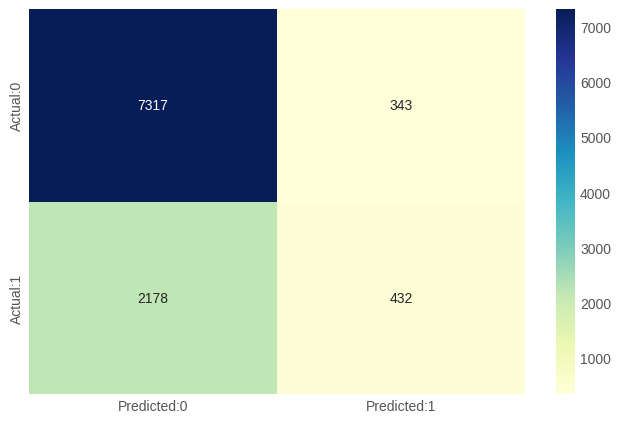

In [76]:
#

plt.figure( figsize = (8,5) )

sn.heatmap( conf_matrix, annot = True, fmt = 'd', cmap = "YlGnBu" )

plt.show()

In [77]:
# accuracy

(7316 + 430) / (7316 + 430 + 344 + 2180)

0.7542356377799416

In [78]:
# Model Evaluation - Statistics

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7545277507302823 
 The Missclassification = 1-Accuracy =  0.24547224926971767 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.16551724137931034 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9552219321148825 
 Positive Predictive value = TP/(TP+FP) =  0.5574193548387096 
 Negative predictive Value = TN/(TN+FN) =  0.7706161137440758 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.6963908716195824 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.8736009199172452


In [79]:
# Calculamos las probabiliades:

y_pred_prob    = logreg.predict_proba( X_test )[: , :]

y_pred_prob_df = pd.DataFrame( data = y_pred_prob,
                               columns = ['Prob de delito bajo impacto (0)','Prob de robo (1)'] )

y_pred_prob_df.head()

,Prob de delito bajo impacto (0),Prob de robo (1)
0,0.896616,0.103384
1,0.960422,0.039578
2,0.623107,0.376893
3,0.457612,0.542388
4,0.682289,0.317711


### ROC curve

Una forma común de visualizar las compensaciones de diferentes umbrales es mediante el uso de una curva ROC, un gráfico de la tasa de verdaderos positivos (# verdaderos positivos/# total de positivos) versus la tasa de falsos positivos (# falsos positivos/# total de negativos) para todas las opciones posibles de umbrales. Un modelo con buena precisión de clasificación debería tener significativamente más positivos verdaderos que falsos positivos en todos los umbrales.

La posición óptima para la curva roc es hacia la esquina superior izquierda, donde la especificidad y la sensibilidad están en niveles óptimos.

Área bajo la curva (AUC). El área bajo la curva ROC cuantifica la precisión de la clasificación del modelo; cuanto mayor sea el área, mayor será la disparidad entre los verdaderos y falsos positivos, y más fuerte será el modelo para clasificar los miembros del conjunto de datos de entrenamiento. Un área de 0,5 corresponde a un modelo que no funciona mejor que la clasificación aleatoria y un buen clasificador se mantiene lo más lejos posible de eso. Un área de 1 es ideal. Cuanto más cerca esté el AUC de 1, mejor.

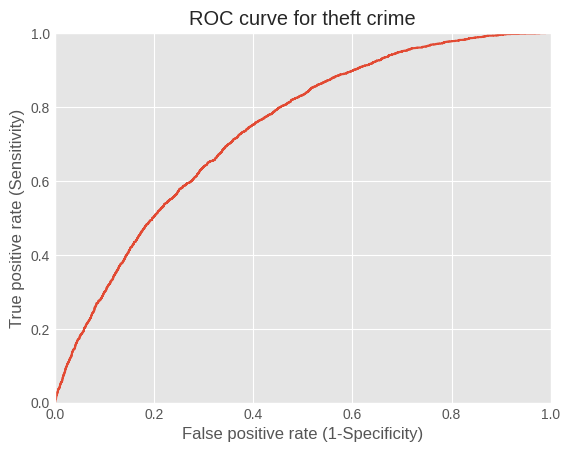

In [80]:
#

fpr, tpr, thresholds = roc_curve( y_test, y_pred_prob_df.iloc[:,1] )

#
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for theft crime')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [81]:
#

roc_auc_score(y_test, y_pred_prob_df.iloc[:,1])

0.7380771385412603

## SECCIÓN V:

### Prediciendo sobre el dataset que queremos clasificar

* Usemos los datos de 2023 para clasificar "ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA"

In [82]:
# Seleccionamos solo los casos de interés para Dataset 02

Datos_02 = Datos_02[ ( Datos_02['categoria_delito'] == 'DELITO DE BAJO IMPACTO' ) | \
                     ( Datos_02['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA' ) ]

# Variable categórica:
Datos_02[ 'Delito' ] = 0

Datos_02.loc[ Datos_02['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 'Delito'] = 1

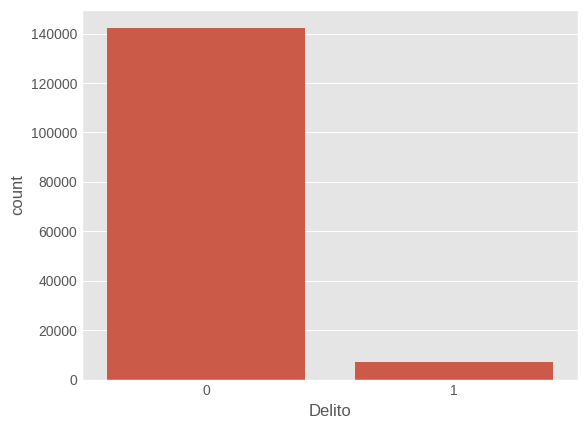

In [83]:
#

sn.countplot( x = 'Delito', data = Datos_02)

plt.show()

In [84]:
#

Datos_02.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,hora_hecho_hora,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Dias,Femenino,Masculino,edad,Victima,Victima_y_Otra,latitud,longitud,Delito
count,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000,149661.000000
mean,0.145482,0.142736,0.145970,0.143511,0.145943,0.134544,0.141814,12.166403,0.014640,0.030830,0.028671,0.026366,0.023106,0.026380,0.030816,0.040251,0.048870,0.054704,0.070967,0.066016,0.090885,0.042222,0.046806,0.046051,0.043645,0.042235,0.041367,0.041474,0.047073,0.038788,0.031732,0.026106,12.597482,0.542920,0.457020,39.384322,0.111285,0.888715,19.381561,-99.135892,0.048269
std,0.352587,0.349805,0.353077,0.350594,0.353050,0.341237,0.348860,5.977542,0.120106,0.172857,0.166882,0.160222,0.150239,0.160262,0.172820,0.196548,0.215598,0.227402,0.256771,0.248311,0.287447,0.201096,0.211223,0.209596,0.204305,0.201127,0.199138,0.199384,0.211796,0.193089,0.175286,0.159450,37.764462,0.498156,0.498151,16.127337,0.314486,0.314486,0.073263,0.063563,0.214335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.126574,-99.341338,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334525,0.000000,0.000000,28.000000,0.000000,1.000000,19.329287,-99.175711,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.567454,1.000000,0.000000,37.000000,0.000000,1.000000,19.384299,-99.139355,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.676389,1.000000,1.000000,50.000000,0.000000,1.000000,19.436365,-99.095135,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,364.988889,1.000000,1.000000,99.000000,1.000000,1.000000,19.579410,-98.948363,1.000000


In [85]:
#

Datos_02[ 'Constante' ] = 1

X_New = Datos_02[[ 'Constante', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
                   '15', '16', '17', '18', '19', '20', '21', '22', '23',
                   'Femenino', 'Victima', 'Dias', 'edad', 'latitud', 'longitud']]

Datos_02[ 'Delito_Predict' ] = logreg.predict(X_New)

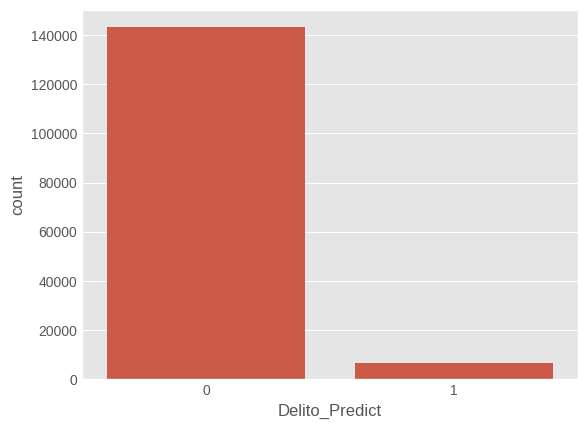

In [86]:
#

sn.countplot( x = 'Delito_Predict', data = Datos_02)

plt.show()

In [87]:
#

Datos_02[ ['Delito', 'Delito_Predict'] ].describe()

,Delito,Delito_Predict
count,149661.000000,149661.000000
mean,0.048269,0.044367
std,0.214335,0.205910
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000
